In [12]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [103]:
import matplotlib.pyplot as plt
import csv

def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

def exponential_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

# define the true objective function
def second_degree_fit(x, a, b, c):
	return a * x + b * x**2 + c

# define the true objective function
def third_degree_fit(x, a, b, c, d):
	return a * x + b * x**2 + c* x**3 + d 


def plot_results(path, title):
    x = []
    y = []

    with open(path,'r') as csvfile:
        lines = csv.reader(csvfile, delimiter=',')
        for row in lines:
            if float(row[1]) > 50:
                continue
            x.append(int(row[0]))
            y.append((float(row[1])))
            
#     print(f'avg= {sum(y)/len(y)}')
    
    parameters, covariance = curve_fit(second_degree_fit,  np.asarray(x) , np.asarray(y))
    fit_A = parameters[0]
    fit_B = parameters[1]
    fit_C = parameters[1]
    
    parameters3, covariance3 = curve_fit(third_degree_fit,  np.asarray(x) , np.asarray(y))
    
    
    x_min = 5
    x_max = max(x)                                #min/max values for x axis
    x_fit = np.linspace(x_min, x_max, 100)   #range of x values used for the fit function
    plt.plot(x_fit, second_degree_fit(x_fit, *parameters), '-', label='Fit_2nd_degree')
    plt.plot(x_fit, third_degree_fit(x_fit, *parameters3), '-', label='Fit_3nd_degree')

    print(f'A: {fit_A}')
    print(f'B: {fit_B}')
    print(f'C: {fit_C}')
    
    
#     poly = np.polyfit(y, x, deg=5)
    
    plt.scatter(x, y, color = 'g')
#     plt.plot(np.polyval(poly, x), label='fit')
    plt.xticks(rotation = 25)
    plt.xlabel('size m=n')
    plt.ylabel('time (sec)')
    plt.title(title, fontsize = 20)
    plt.grid()
    plt.legend()
    plt.show()


In [104]:
plot_results('test_results/MSE_Gram.txt', 'Gram Schimidt MSE vs Size')

plot_results('test_results/MSE_house.txt', 'Householder MSE vs Size')


FileNotFoundError: [Errno 2] No such file or directory: 'test_results/MSE_Gram.txt'

# Matrix generation

The matricies are generated using the following code in  `generate_data.py`: 

 ##  Generating random Q and R to produce A for MSE testing:
 ###  `generate_Q_R(length)` 
 using scipy we can create random orthogonal matrix Q and random upper triangular R to get A by the `np.dot(Q, R)`
 
 
 ##   Generating random Dense and Sparce Matricies:
  ###  `generate_dense(length)` 
  ###  `generate_saprce(length)` 
  using `scipy.sparse` to determine the density of the matrix 
    

A: -0.00025125828997289
B: 2.158897168790447e-07
C: 2.158897168790447e-07


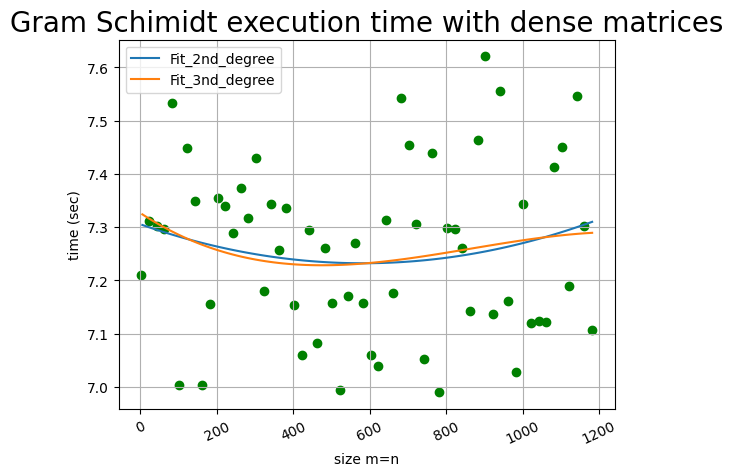

A: 0.0004058638800762404
B: 4.374811760632369e-07
C: 4.374811760632369e-07


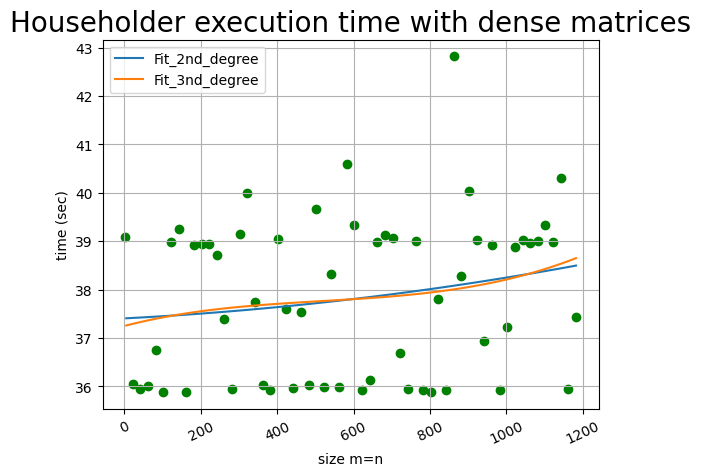

In [75]:
plot_results('test_results/gram_dense_results.txt', 'Gram Schimidt execution time with dense matrices')

plot_results('test_results/house_dense_results.txt', 'Householder execution time with dense matrices')


## testing with sparce data

A: -0.00221395578806545
B: 1.9032606570473912e-06
C: 1.9032606570473912e-06


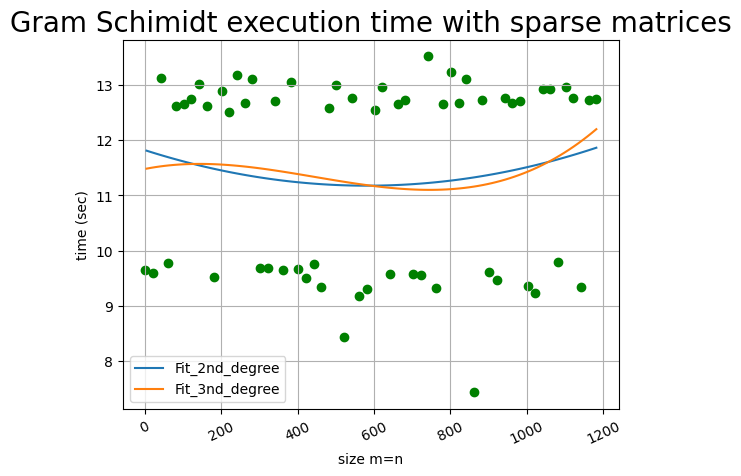

A: 0.0005771866057515462
B: -7.46920161742568e-07
C: -7.46920161742568e-07


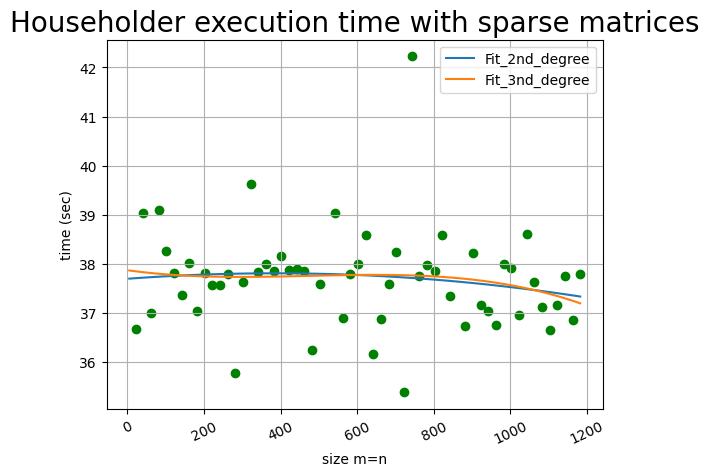

In [105]:
plot_results('test_results (copy)/gram_sparce_results.txt', 'Gram Schimidt execution time with sparse matrices')
plot_results('test_results (copy)/house_sparce_results.txt', 'Householder execution time with sparse matrices')

A: 2.2440308115347545e-05
B: 5.074819216361026e-06
C: 5.074819216361026e-06


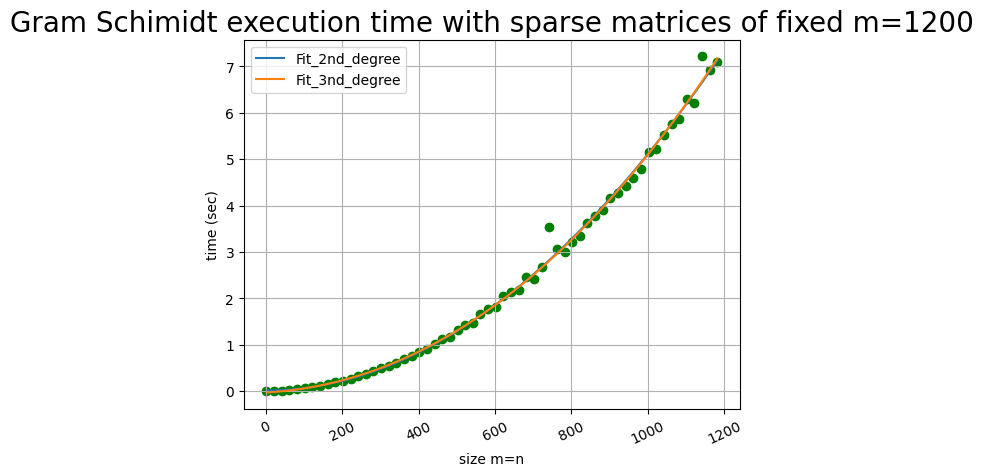

A: 0.023227504403551154
B: 6.5710787409574395e-06
C: 6.5710787409574395e-06


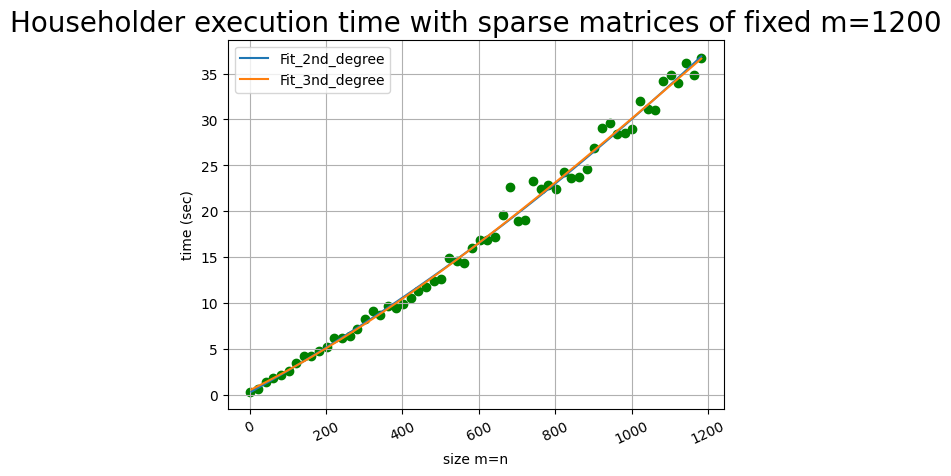

In [90]:
plot_results('test_results (copy)/gram_sparce_m_results.txt', 'Gram Schimidt execution time with sparse matrices of fixed m=1200')
plot_results('test_results (copy)/house_sparce_m_results.txt', 'Householder execution time with sparse matrices of fixed m=1200')


A: 6.456300191204646e-05
B: 5.094574915755206e-06
C: 5.094574915755206e-06


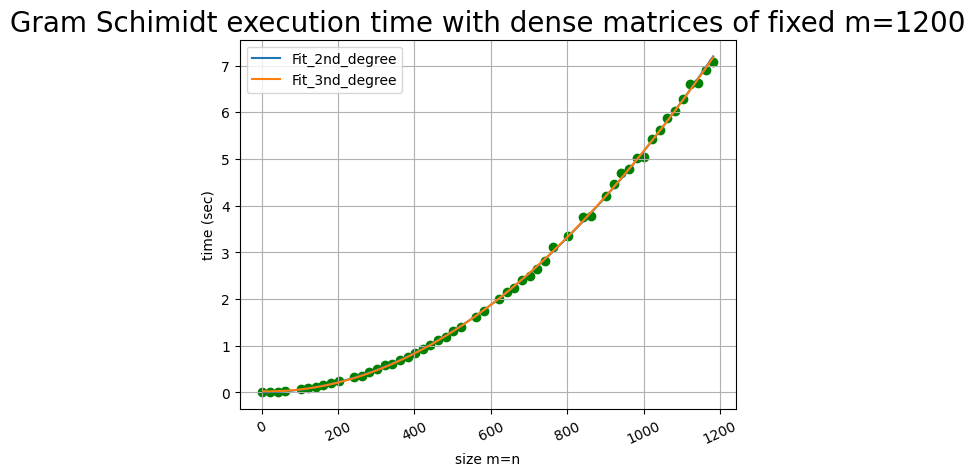

A: 0.02144913576350344
B: 7.998955921325854e-06
C: 7.998955921325854e-06


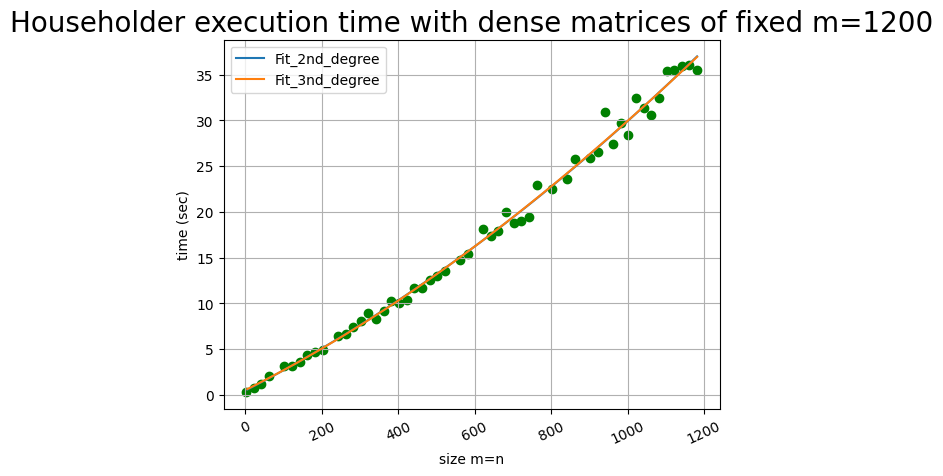

In [78]:
plot_results('test_results (copy)/gram_dense_m_results.txt', 'Gram Schimidt execution time with dense matrices of fixed m=1200')
plot_results('test_results (copy)/house_dense_m_results.txt','Householder execution time with dense matrices of fixed m=1200')


A: 8.513525872548509e-08
B: 2.557270651522479e-10
C: 2.557270651522479e-10


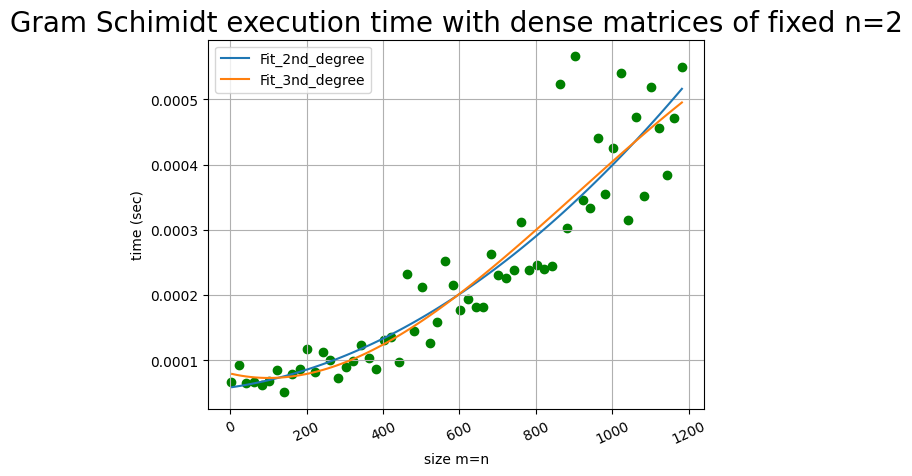

A: -0.00021545235883603346
B: 1.7741609830646233e-07
C: 1.7741609830646233e-07


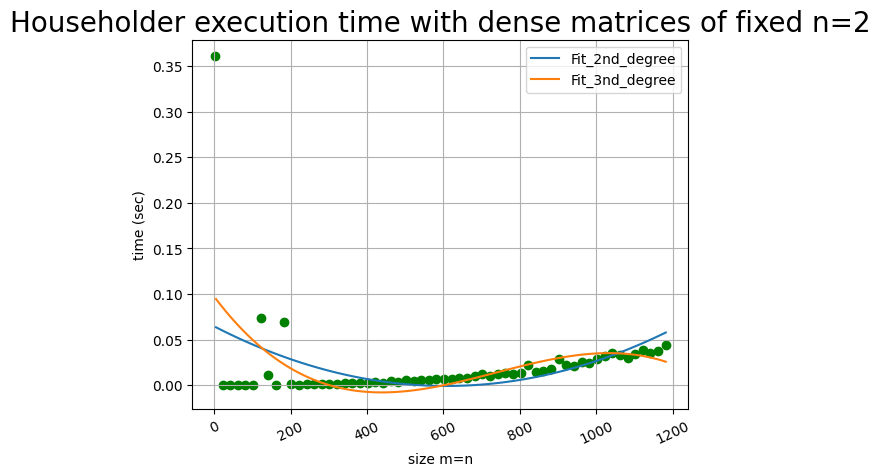

In [95]:
plot_results('test_results (copy)/gram_dense_n_results.txt', 'Gram Schimidt execution time with dense matrices of fixed n=2')
plot_results('test_results (copy)/house_dense_n_results.txt','Householder execution time with dense matrices of fixed n=2')
